# Food.com - Recipes and Reviews
### About Dataset
The recipes dataset contains 522,517 recipes from 312 different categories. This dataset provides information about each recipe like cooking times, servings, ingredients, nutrition, instructions, and more.
The reviews dataset contains 1,401,982 reviews from 271,907 different users. This dataset provides information about the author, rating, review text, and more.

In [1]:
import kagglehub
import pandas as pd

# Optionally, set your Kaggle config dir if needed
import os
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import numpy as np

In [3]:
os.environ["KAGGLE_CONFIG_DIR"] = os.path.expanduser("~/.kaggle")

# Download the dataset
dataset_path = kagglehub.dataset_download("irkaal/foodcom-recipes-and-reviews")

# Load a CSV from the dataset
recipes = pd.read_csv(f"{dataset_path}/recipes.csv")
reviews = pd.read_csv(f"{dataset_path}/reviews.csv")

# recipes.to_csv("input_data/reviews.csv")
# reviews.to_csv("input_data/recipes.csv")

In [4]:
# We have ~500K recipes and 1.4M reviews
print("Total number of rows and columns in Recipes file:", recipes.shape)
print("Total number of rows and columns in Reviews file", reviews.shape)

Total number of rows and columns in Recipes file: (522517, 28)
Total number of rows and columns in Reviews file (1401982, 8)


In [5]:
recipes.loc[0,]

RecipeId                                                                     38
Name                                          Low-Fat Berry Blue Frozen Dessert
AuthorId                                                                   1533
AuthorName                                                               Dancer
CookTime                                                                  PT24H
PrepTime                                                                  PT45M
TotalTime                                                              PT24H45M
DatePublished                                              1999-08-09T21:46:00Z
Description                   Make and share this Low-Fat Berry Blue Frozen ...
Images                        c("https://img.sndimg.com/food/image/upload/w_...
RecipeCategory                                                  Frozen Desserts
Keywords                      c("Dessert", "Low Protein", "Low Cholesterol",...
RecipeIngredientQuantities              

In [6]:
# For example all the reviews for the food above
reviews.loc[reviews['RecipeId'] == 38, 'Review']

532978     Yummy, yummy, yummy! I am a big fan of fruit a...
716354     very good!! the directions were alittle weird ...
1261835    This does taste great! I think the recipe need...
1263786    Tasty and refreshing! I love the creamy flavor...
Name: Review, dtype: object

In [7]:
reviews.loc[0,]

ReviewId                                                    2
RecipeId                                                  992
AuthorId                                                 2008
AuthorName                                          gayg msft
Rating                                                      5
Review           better than any you can get at a restaurant!
DateSubmitted                            2000-01-25T21:44:00Z
DateModified                             2000-01-25T21:44:00Z
Name: 0, dtype: object

### Lets see how many nan values in each columns we have?


In [8]:
recipes.isna().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

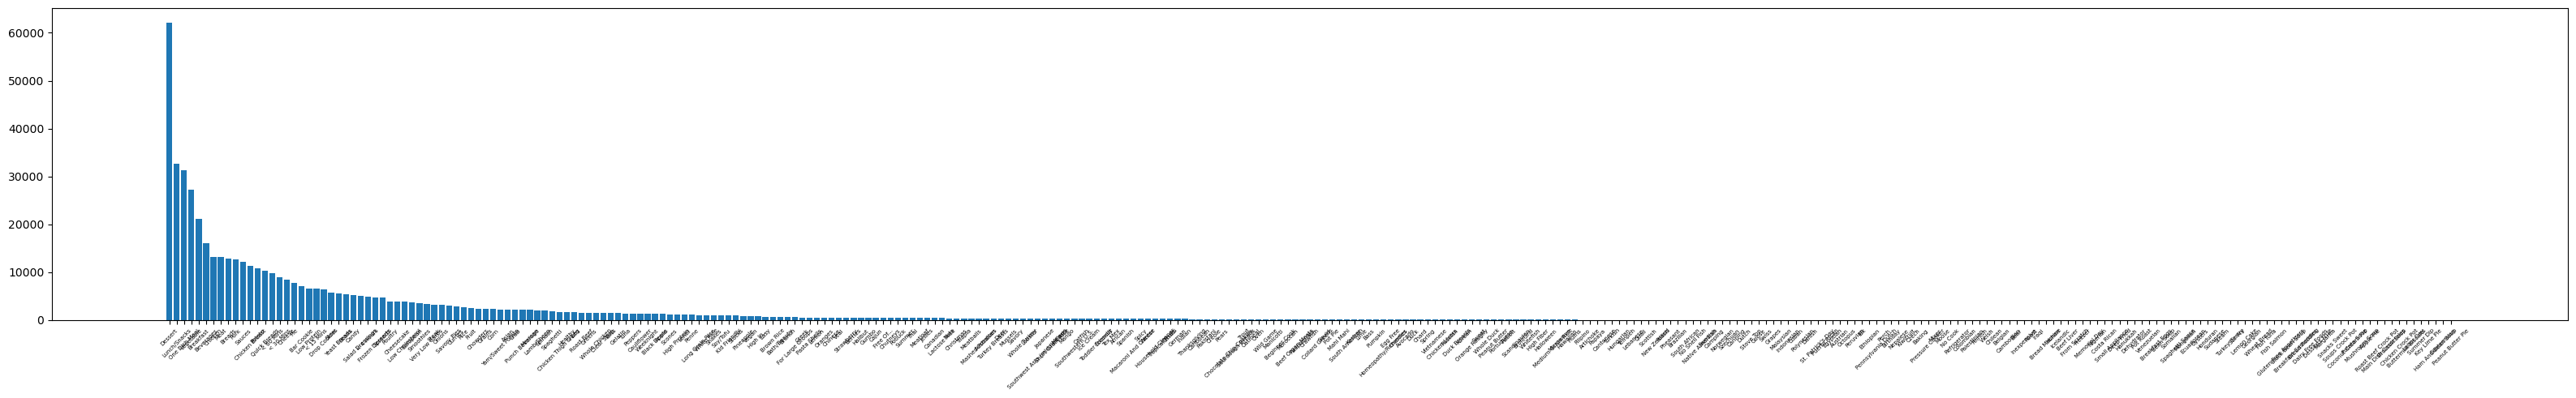

RecipeCategory
Dessert              62072
Lunch/Snacks         32586
One Dish Meal        31345
Vegetable            27231
Breakfast            21101
                     ...  
Summer Dip               1
Key Lime Pie             1
Ham And Bean Soup        1
Guatemalan               1
Peanut Butter Pie        1
Name: count, Length: 311, dtype: int64


In [9]:
# RecipeCategory seems like a good information that we dont have for 750 recipes
plt.figure(figsize=(40, 5))
counts = recipes.value_counts('RecipeCategory')
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45, size =5)  # if labels are long
plt.show()

print(counts)

In [10]:
# Lets see some examples of the missing values
for i in [10, 20, 30]:
    print(recipes.loc[i, 'Keywords'])
    print(recipes.loc[i,'RecipeIngredientQuantities'])
    print(recipes.loc[i,'AggregatedRating'])
    print(recipes.loc[i,'ReviewCount'])
    print(recipes.loc[i,'RecipeServings'])
    print(recipes.loc[i, 'RecipeYield'])

c("Dessert", "Weeknight", "Oven", "< 4 Hours")
c("1/2", "2 1/4", "3", "1", "1 1/2", "1/3", "1 1/2", "2", "1", "1/3", "1", "1 1/2", "1", "1/2", "1", "1/4", "1", "1 1/2", "2", "1")
2.0
2.0
8.0
1 pie
c("Vegetable", "Meat", "Low Cholesterol", "Healthy", "Free Of...", "Weeknight", "< 4 Hours")
c("1 1/2", "1", "1", "1/2", "1/2", "1", "1/2", "3", "5 1/2", "1", "2", "1")
4.5
7.0
6.0
nan
c("Mexican", "Free Of...", "Weeknight", "Easy")
c("1 1/2", "1", "1")
nan
nan
nan
1 batch


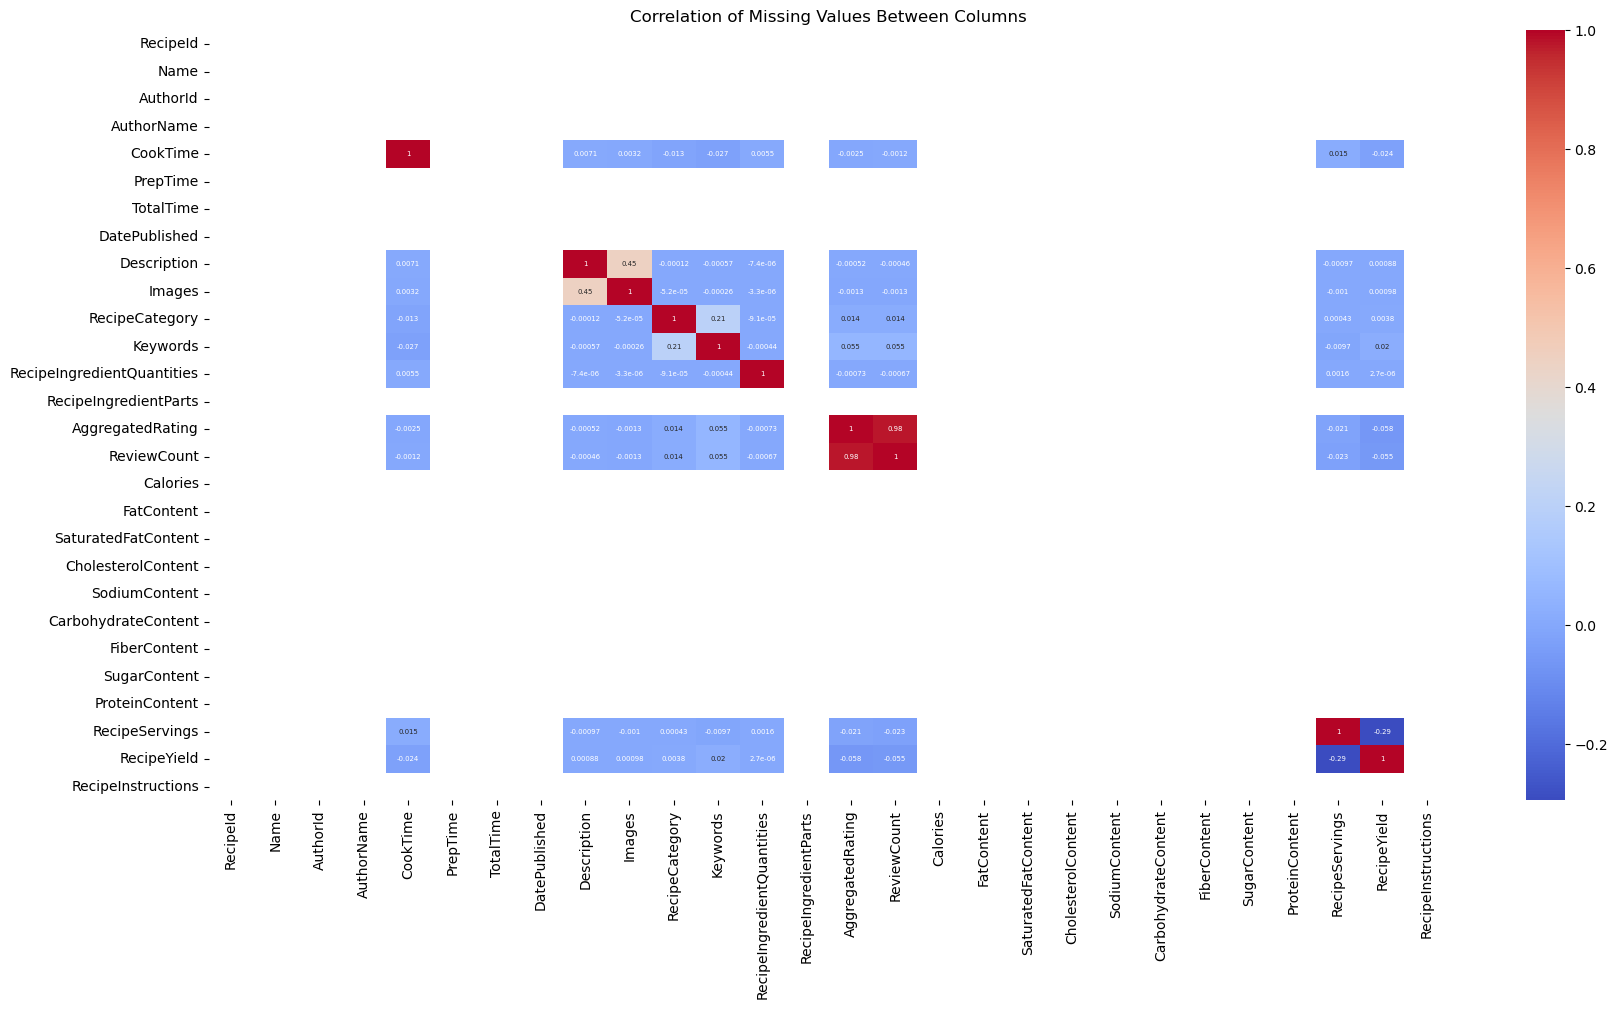

In [11]:
# Boolean mask of missing values
missing = recipes.isna()

# Compute correlation between columns for missingness
missing_corr = missing.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(missing_corr, annot=True, cmap="coolwarm", annot_kws={"size": 5})
plt.title("Correlation of Missing Values Between Columns")
plt.show()

In [12]:
drop_columns = ["CookTime", "Keywords", "AggregatedRating", "ReviewCount", "RecipeServings", "RecipeYield", "RecipeIngredientQuantities", "Images", "Description", "PrepTime", "TotalTime"]
recipes = recipes.drop(columns=drop_columns, axis=1)

In [13]:
recipes = recipes.dropna(subset=['RecipeCategory'])

In [14]:
recipes.shape

(521766, 17)

In [15]:
numeric_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 
                'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                'SugarContent', 'ProteinContent']  
recipes[numeric_cols].head()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


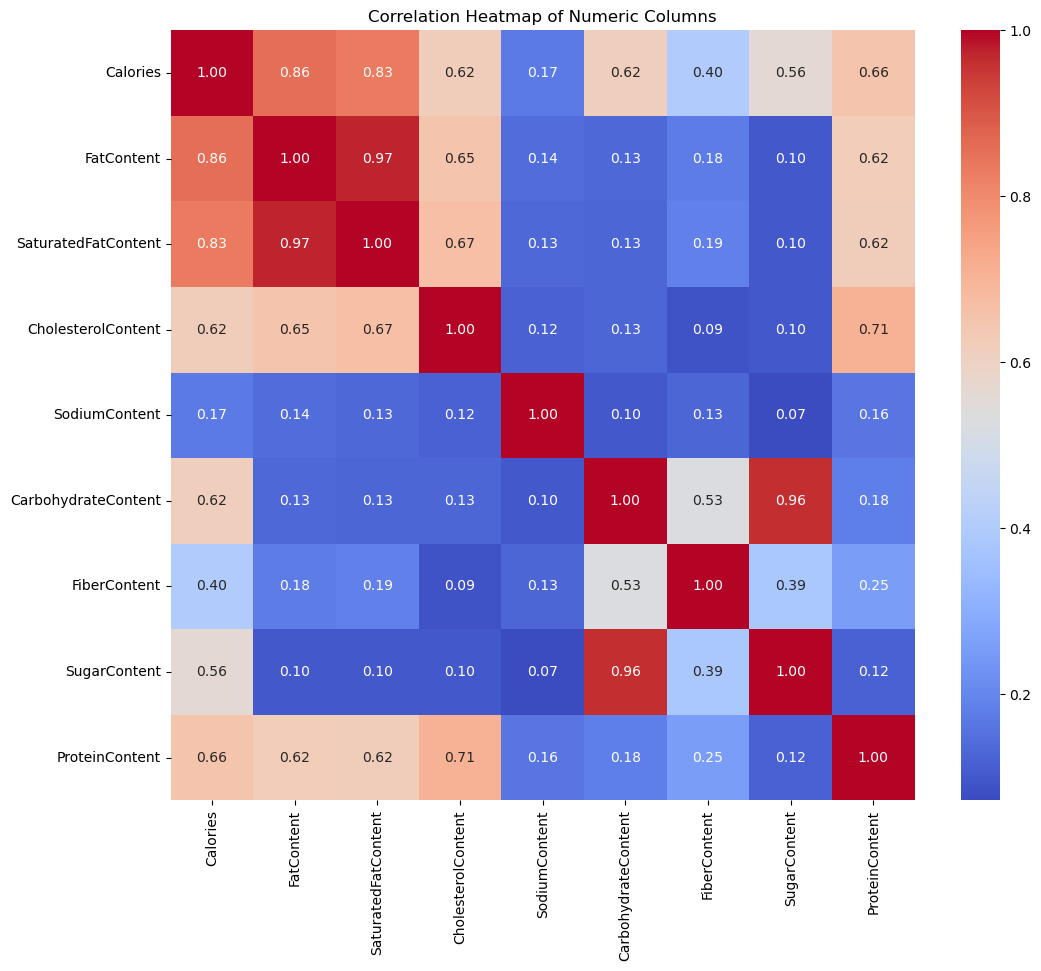

In [16]:
corr_matrix = recipes[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

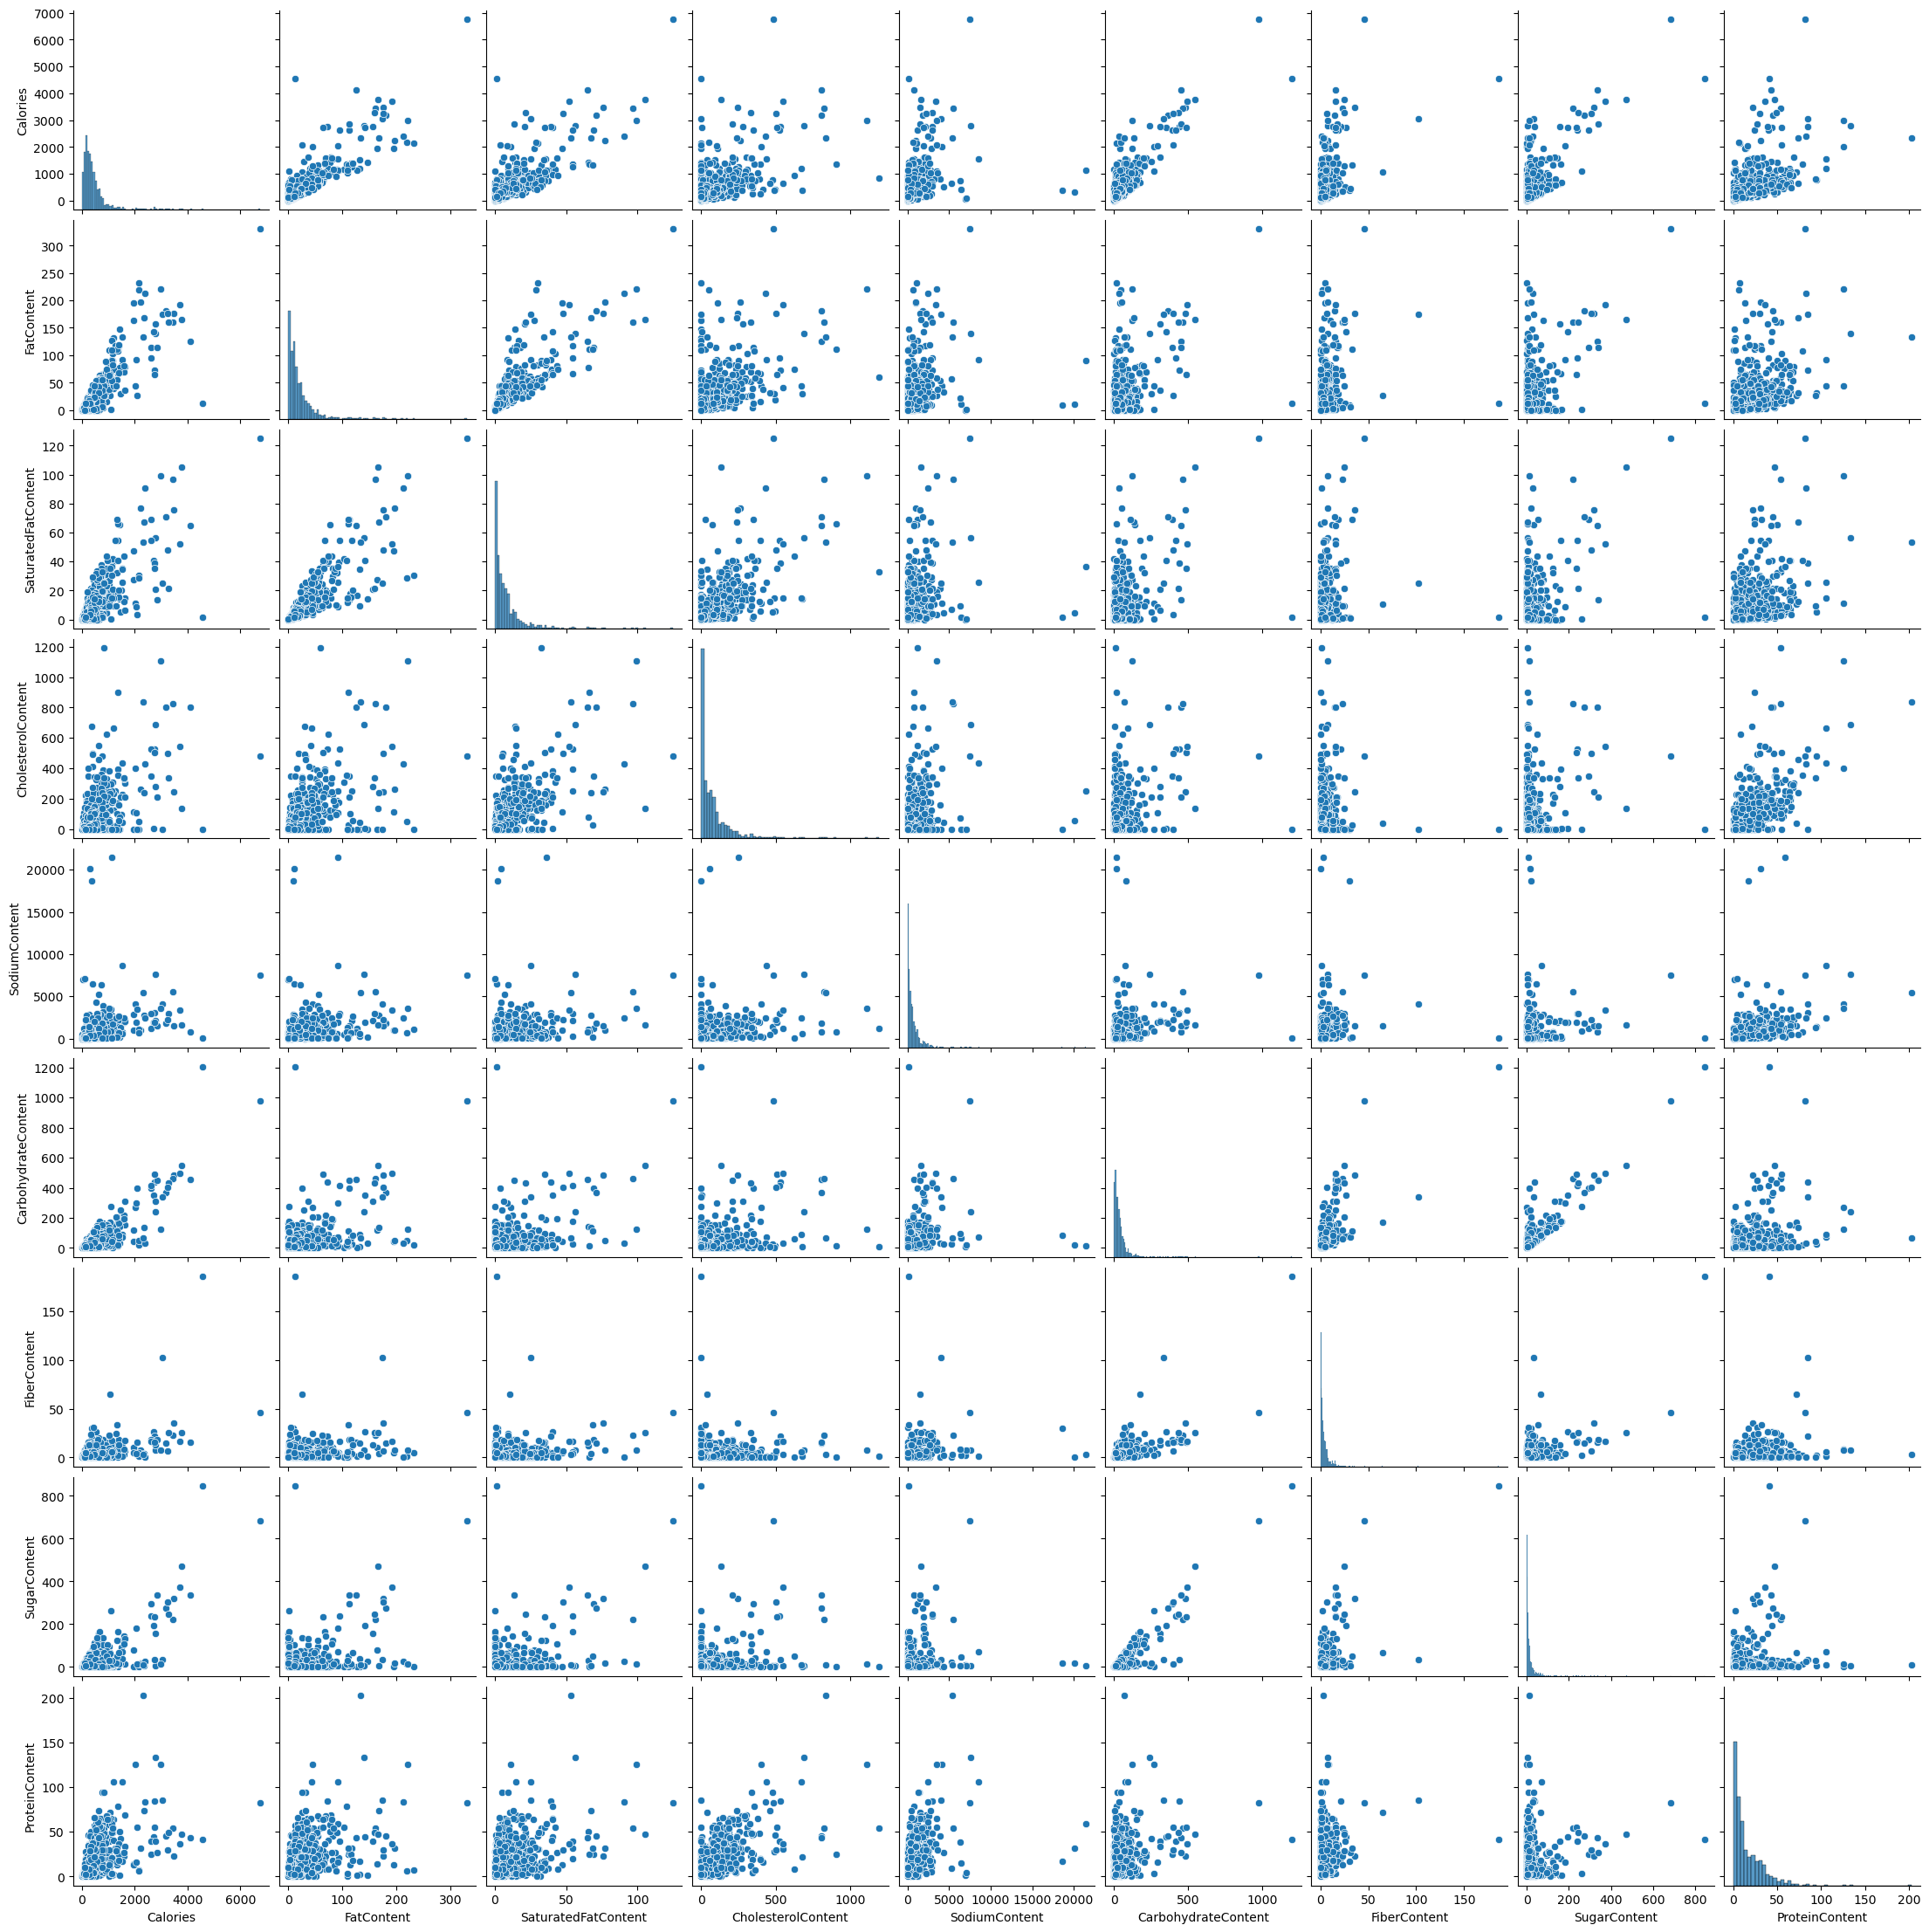

In [17]:
sns.pairplot(recipes[numeric_cols].sample(1000))
plt.show()

In [18]:
recipes.Calories.sort_values().reset_index()


,index,Calories
0,320820,0.0
1,246436,0.0
2,27312,0.0
3,78681,0.0
4,4823,0.0
...,...,...
521761,53650,90904.2
521762,218186,101614.7
521763,501590,350473.1
521764,185088,434360.2


In [19]:
recipes[recipes['Calories'] == 612854.6]['RecipeInstructions'].iloc[0]


'c("Scrub a good oak barrel thoroughly.", "Put as much fresh-killed beef as desired to be corned in the barrel and cover with cold water, covering by two inches.", "Let stand for 48 hours.", "Drain off the water and measure before discarding.", "Measure the same amount of cold water (spring water, preferably) and to every gallon of water formerly used, add the above proportions of salt sugar and saltpeter.", "Boil for 15 minutes and skim.", "When cold, pour over the beef.", "Place a heavy weight on meet to keep it under the brine.", \n"Store in a cool cellar.", "The corned beef will be ready to use after ten days.")'

### Lets look at the outliers

In [20]:
print(recipes[recipes['Calories']>5000].shape[0])
print(recipes[recipes['Calories']<1000].shape[0])

2609
482075


In [21]:
# How many of data point fall after 99.5 percentile of the datapoint for each feature
outliers = set()
for cols in numeric_cols:
    indices = recipes[recipes[cols] > recipes[cols].quantile(0.995)].index
    print(f" Number of {cols} outliers: ", recipes[recipes[cols] > recipes[cols].quantile(0.995)].shape[0])
    outliers.update(indices)

print("===================================")
print("In total we have this many outliers:", len(outliers))

 Number of Calories outliers:  2609
 Number of FatContent outliers:  2609
 Number of SaturatedFatContent outliers:  2609
 Number of CholesterolContent outliers:  2609
 Number of SodiumContent outliers:  2609
 Number of CarbohydrateContent outliers:  2609
 Number of FiberContent outliers:  2593
 Number of SugarContent outliers:  2606
 Number of ProteinContent outliers:  2608
In total we have this many outliers: 10828


In [22]:
# Dropping all the outliers
recipes = recipes.drop(index=outliers)

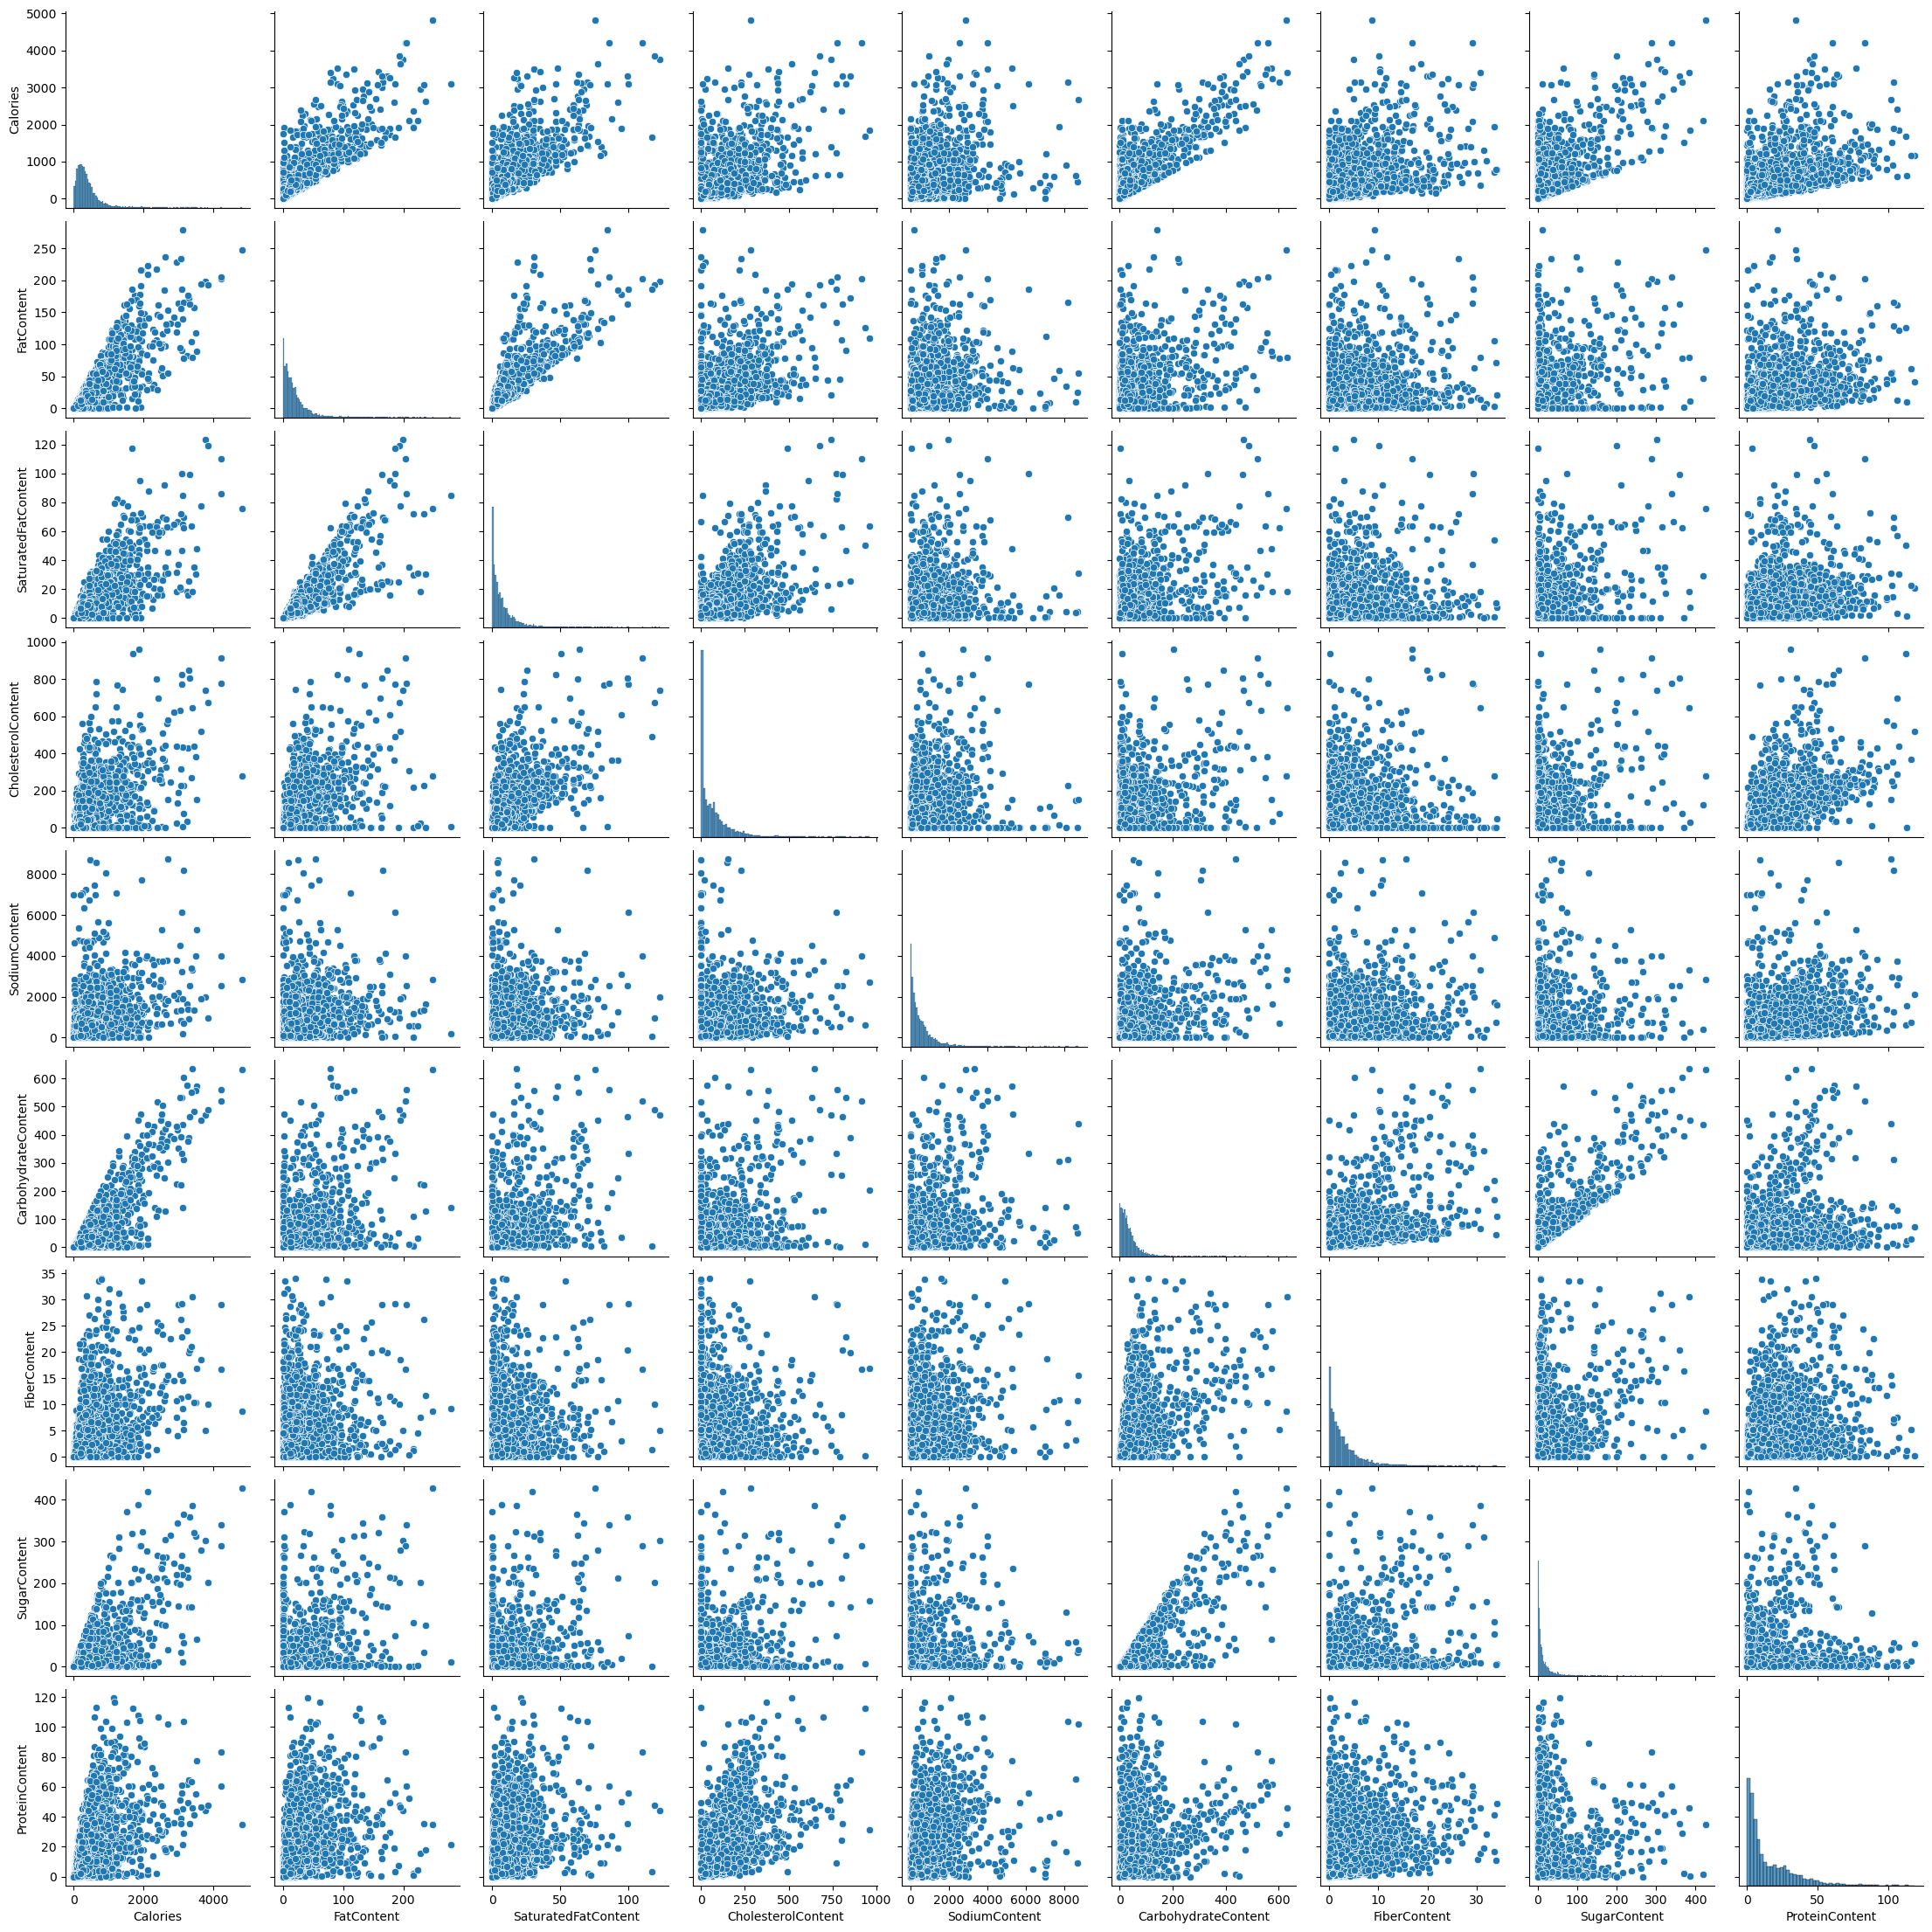

In [23]:
sns.pairplot(recipes[numeric_cols].sample(5000))
plt.show()

In [24]:
recipes.shape

(510938, 17)

In [25]:
recipes.isna().sum()

RecipeId                 0
Name                     0
AuthorId                 0
AuthorName               0
DatePublished            0
RecipeCategory           0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
dtype: int64

In [26]:
# recipes.to_csv("cleaned_recipes.csv")

### Now Lets look at the reviews

In [27]:
# reviews.groupby('AuthorId')['Review'].count().sort_values(ascending=False).head(50)

In [28]:
# reviews[reviews['AuthorId'] == 424680]

In [29]:
# print(reviews.shape)
# reviews.isna().sum()

In [30]:
# less_rows_reviews = reviews.dropna(subset=['Review'])
# print(less_rows_reviews.shape)

In [31]:
# less_rows_reviews.to_csv("cleaned_reviews.csv")

# Now lets prepare the data for VAE

We have both numeric and text features that we would like to use both. In order to be able to use both at the same time, we need to have two arms for the text data and for the numeric data. The numeric data should be scaled and the text data must be vectorized. For the text we can use one of the pretrained llm models to generate embeding for them and that embedign will go the the model as input.

In [32]:
# recipes = pd.read_csv("cleaned_recipes.csv")

In [33]:
numeric_cols

['Calories',
 'FatContent',
 'SaturatedFatContent',
 'CholesterolContent',
 'SodiumContent',
 'CarbohydrateContent',
 'FiberContent',
 'SugarContent',
 'ProteinContent']

In [34]:
text_cols = ['Name', 'RecipeCategory', 'RecipeIngredientParts', 'RecipeInstructions']
recipes[text_cols].head()

,Name,RecipeCategory,RecipeIngredientParts,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,Frozen Desserts,"c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,Biryani,Chicken Breast,"c(""saffron"", ""milk"", ""hot green chili peppers""...","c(""Soak saffron in warm milk for 5 minutes and..."
2,Best Lemonade,Beverages,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...","c(""Into a 1 quart Jar with tight fitting lid, ..."
3,Carina's Tofu-Vegetable Kebabs,Soy/Tofu,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,Vegetable,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""Mix everything together and bring to a boil..."


In [35]:
numeric_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 
                'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                'SugarContent', 'ProteinContent']  

print(recipes.isna().sum())
recipes[numeric_cols].head()

RecipeId                 0
Name                     0
AuthorId                 0
AuthorName               0
DatePublished            0
RecipeCategory           0
RecipeIngredientParts    0
Calories                 0
FatContent               0
SaturatedFatContent      0
CholesterolContent       0
SodiumContent            0
CarbohydrateContent      0
FiberContent             0
SugarContent             0
ProteinContent           0
RecipeInstructions       0
dtype: int64


,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
1,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4
2,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3
3,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3


In [37]:
import  torch 
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# 1.1 Create a single text string per recipe (consistent template)
def row_to_text(row):
    return (
        f"title: {row.get('Name','')} | "
        f"ingredients: {row.get('RecipeIngredientParts','')} | "
        f"category: {row.get('RecipeCategory','')} | "
        f"description: {row.get('RecipeInstructions','')}"
    )
texts = recipes.apply(row_to_text, axis=1).astype(str).tolist()

MAX_CHAR_LENGTH = 1500  # Set a safe limit

# 1. First, define a function to safely truncate
def safe_truncate(text):
    return text[:MAX_CHAR_LENGTH]
text_inputs_truncated = [safe_truncate(text) for text in texts]

# 1.2 Embed (precompute & save)
MODEL_NAME = 'all-MiniLM-L6-v2'
# MODEL_NAME = 'all-mpnet-base-v2'
embed_model = SentenceTransformer(MODEL_NAME, device=device)  # fast & compact

BATCH = 256  # smaller batch to avoid GPU overload
embeds_path = f'input_data/{MODEL_NAME}_text_embeds.npy'

if os.path.exists(embeds_path):
    text_embeds = np.load(embeds_path)
else:
    text_embeds = embed_model.encode(
        text_inputs_truncated,
        batch_size=BATCH,
        show_progress_bar=True,
        convert_to_numpy=True,
        device=device
    )
    np.save(embeds_path, text_embeds)

# 1.3 Numeric features: select and scale (save scaler)
X_num = recipes[numeric_cols].astype(float)
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

Using device: cpu


Batches:   0%|          | 0/1996 [00:00<?, ?it/s]

In [38]:
numeric_feature_headers = np.array(numeric_cols, dtype=str)
np.savez(
    f'input_data/{MODEL_NAME}_vae_input_data.npz',
    text_embeds=text_embeds,          # The Sentence Embeddings
    numeric_scaled=X_num_scaled,      # The scaled numeric values
    numeric_headers=numeric_feature_headers, # The column names for the numeric data
    recipes=recipes.to_records(index=False)                 # The original recipe data (metadata)
)

print(f"Data saved to input_data/{MODEL_NAME}_vae_input_data.npz")

Data saved to input_data/all-MiniLM-L6-v2_vae_input_data.npz
